# 6. Heart Disease Prediction

#### **By Agustinus Angelo Christian Fernando (feat: Benaya Imanuela)** 

#### **Workflow Machine Learning : train data to predict new data using previous data**

##### **Data Processing**
1. Menampilkan informasi tentang data (shape, dtypes, dll)
2. Cek apakah ada baris yang duplicated --> drop
3. Drop kolom non numerik yang 100% unique
4. Cek berapa baris yang null
- jika lebih dari 60% - 70% yang null, maka drop saja kolomnya
- jika kurang dari 15% yang null, maka drop saja barisnya
- jika diantara itu, bisa dilakukan pengolahan null value (imputation=n-nearist-neighbor, forward/ backward fill, mean-median=numeric modus=string)
5. Lakukan encoding (one hot encoder=0-1, more column / label encoder=0-1-2-etc, more index ). Pastikan sudah tidak ada yang tipe datanya object(cek menggunakan dtypes)
##### **Machine Learning**
6. Split data menjadi X (features=input) dan y (label=output)
7. Split data menjadi data train dan data test
8. Coba beberapa model (sesuaikan dengan jenis datanya, diskret, kontinu)
- Lakukan fitting, kemudian predict
- titanic = Logistic Regression, Random Forest Classifier
- heart disease = Logistic Regression, Gradient Boosting Classifier, Catboost Classifier (👍). XGB Classifier  (👍)
9. Evaluasi akurasi model (cek apakah overfitting= jarak antara data train dan test > 6% atau underfitting=data test < 80%>)
10. Jika hasil akurasi kurang memuaskan, lakukan feature engineering/ remove outlier/ normalisasi
11. Lakukan feature engineering
- cek apakah ada feature yang tidak diperlukan
- cek apakah ada feature yang bisa disederhanakan
12. Remove outlier jika ada yang parah
13. Lakukan normalisasi dengan standardscaler / minmax scaler
14. Jika feature engineering tidak mampu menaikan akurasi model, coba gunakan model lain dan atur parameternya (tunning) menggunakan gridsearchcv, dll
##### **Trial & Error:**
15. Compare each method to find the best accuration



#### **0. Import Package**

In [65]:
# import Package yang dibutuhkan

import numpy as np # all mathematical operation
import pandas as pd # data processing (analysis data)
import datetime # display time
import seaborn as sns # elegant and informative visualization (plot & graph)
import matplotlib.pyplot as plt # visualization (plot & graph)
import sklearn # machine learning method library
import xgboost # machine learning method library

#### **1. Display Information of the data**



In [6]:
df = pd.read_csv("data.csv") # read data
df.head(6) # show 6 first data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [4]:
df.info() # show information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
df.values # show all data

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.shape # show shape of data (row, column)

(918, 12)

In [7]:
df.dtypes # show data type of each column

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
df.tail() # show 5 last data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [13]:
df.sample(5) # show 5 random data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
460,57,M,ASY,139,277,1,ST,118,Y,1.9,Flat,1
27,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
126,34,F,ATA,130,161,0,Normal,190,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1


In [14]:
df.describe() # show statistical summary of data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
df["Age"] # show data in column Age
# df.Age # show data in column Age

0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64

In [17]:
df[["Age", "Sex", "RestingBP"]]

,Age,Sex,RestingBP
0,40,M,140
1,49,F,160
2,37,M,130
3,48,F,138
4,54,M,150
...,...,...,...
913,45,M,110
914,68,M,144
915,57,M,130
916,57,F,130


In [18]:
df.iloc[2:6] # show data from index 2 to 5

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


In [20]:
df.loc[df["Age"] > 50] # show data where Age > 50

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [25]:
# df["Age"].loc[df["ChestPainType"] == "ASY"] # show data of age where ChestPainType = ASY 
df["Age"].loc[(df["ChestPainType"] == "ASY") & (df["Cholesterol"] > 200) ] # show data of age where ChestPainType = ASY and Cholesterol > 200 --> use parenthesis ()


3      48
8      37
13     49
18     60
26     53
       ..
897    55
899    61
900    58
901    58
912    57
Name: Age, Length: 304, dtype: int64

In [26]:
df["Age"].min() # show minimum value of Age

28

In [27]:
df["Age"].max() # show maximum value of Age 

77

In [29]:
df.sort_values(by="Age", ascending=True).head()  # sort data by Age ascending and show 5 first data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0


In [34]:
# df.drop(["Age", "RestingBP"], axis=1, inplace=True) # drop column Age and RestingBP permanently
# df.head() # show 5 first data
df.drop(["Age", "RestingBP"], axis=1).head() # drop column Age and RestingBP temporarily 


,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,289,0,Normal,172,N,0.0,Up,0
1,F,NAP,180,0,Normal,156,N,1.0,Flat,1
2,M,ATA,283,0,ST,98,N,0.0,Up,0
3,F,ASY,214,0,Normal,108,Y,1.5,Flat,1
4,M,NAP,195,0,Normal,122,N,0.0,Up,0


In [35]:
# df.drop([0,1,2], axis=0, inplace=True) # drop row 0,1,2 permanently
# df.head() # show 5 first data
df.drop([0,1,2]).head() # drop row 0,1,2 temporarily

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


In [43]:
# df.dropna(subset=["Age"], axis=0, inplace=True) # drop row where Age is null permanently
df.dropna(subset=["Age"]).head() # drop row where Age is null temporarily

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [36]:
# How to use  Numpy

np.cos(np.pi/4) # cos(pi/4)

0.7071067811865476

In [37]:
np.sqrt(4) # square root of 4

2.0

#### **2. Check whether there is duplicate data**

In [9]:
df[df.duplicated()] # show duplicated data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [ ]:
# there is no duplicate data
# if there is duplicate data, you can just drop it using : 
# df = df.drop_duplicates()

#### **3. Drop non-numeric column that 100% unique (name, etc)**

In [6]:
# Display sum of unique value in each column
for col in df.columns:
    print(f"{col} : {len(df[col].unique())} labels")

Age : 50 labels
Sex : 2 labels
ChestPainType : 4 labels
RestingBP : 67 labels
Cholesterol : 222 labels
FastingBS : 2 labels
RestingECG : 3 labels
MaxHR : 119 labels
ExerciseAngina : 2 labels
Oldpeak : 53 labels
ST_Slope : 3 labels
HeartDisease : 2 labels


Based on result above, we not drop any column cuz everything can be use to predict heart disease. If want to drop just use :

df.drop(["Age", "RestingBP", "Sex"], axis=1, inplace=True)

#### **4. Handle Null Value**


##### **Cara-cara mengatasi null values**
 1. Drop Null Values (drop baris atau drop kolom)
 2. Forward Fill & Backward Fill
 3. Mean, Median, Modus (kalau tipe datanya string, biasanya gunakan modus)
 4. Imputation (KNN Imputation)

##### **Kapan pakai cara-cara tersebut?**


- Jika lebih dari 60-70%% yang null, maka drop saja kolomnya
- Jika kurang dari 60%, maka bisa lakukan pengolahan null value (mean, median, modus, forward/backward fill, imputation, dll) **atau** bisa drop saja baris yang menyebabkan null value.

##### **Penting!**
Konsepnya trial and error. Bisa jadi akurasinya lebih bagus kalau didrop barisnya. Tapi, bisa jadi juga lebih bagus kalau dilakukan pengolahan null values. Tidak ada yang pasti.

Jadi, gunakan yang hasil akurasinya paling bagus

In [42]:
# df.isnull().sum() # show sum of missing value in each column
df.isnull().sum()/len(df)*100 # show sum of missing value in each column in percentage

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

There is no null value

**1. HOW TO DROP**
- **DONT FORGET TO SAVE df TO ANOTHER VARIBALE BEFORE DO TRIAL & ERROR** 
- **df1= df.copy()**
- Column : df1.drop(["Age", "RestingBP"], axis=1, inplace=True) 
- Row : df1.drop(2, inplace=True) 
- **or use** df1.dropna(subset=["Age"], inplace=True) to drop row in Age column only

**2. HOW TO FILL WITH FORWARD OR BACKWARD METHOD**

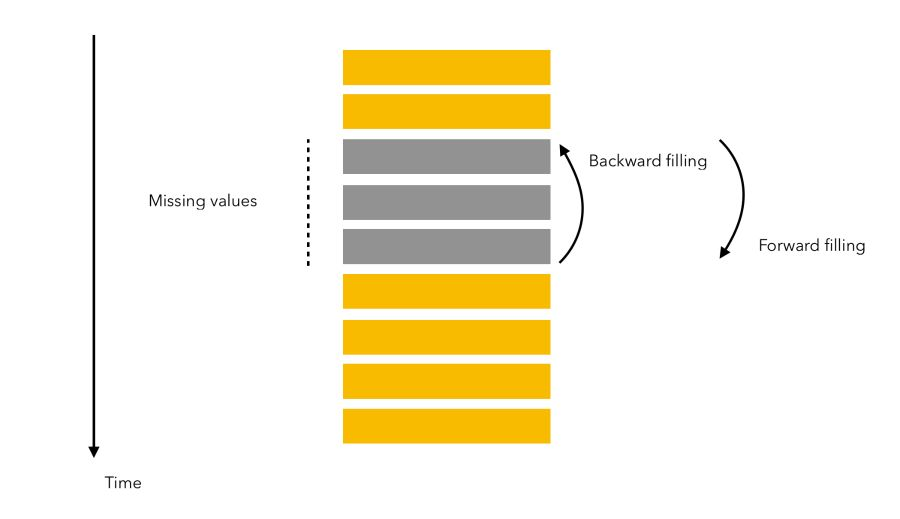



**A. Forward fill**
- df2 = df.copy() # copy, so df is not ruin when we do trial & error
- df2.isnull().sum()/len(df)*100 # see null values in percentage
- df2["Age"] = df2["Age"].fillna(method="ffill") # forward fill method
- df2.isnull().sum()/len(df)*100  # null values in Age column is now gone 


**B. Backward fill**
- df3 = df.copy() # copy, so df is not ruin when we do trial & error
- df3.isnull().sum()/len(df)*100 # see null values in percentage
- df3["Age"] = df3["Age"].fillna(method="bfill") # backward fill method
- df3.isnull().sum()/len(df)*100  # null values in Age column is now gone 

**3. HOW TO FILL WITH MEDIAN MEAN= numeric, MODUS=string**

**MEAN**
- df4 = df.copy() # copy, so df is not ruin when we do trial & error
- df4.isnull().sum()/len(df)*100 # see null values in percentage
- df4["Age"] = df4["Age"].fillna(df4["Age"].mean()) # mean fill method
- df4.isnull().sum()/len(df)*100 # null values in Age column is now gone

**MEDIAN**
- df5 = df.copy() # copy, so df is not ruin when we do trial & error
- df5.isnull().sum()/len(df)*100 # see null values in percentage
- df5["Age"] = df5["Age"].fillna(df5["Age"].median()) # mean fill method
- df5.isnull().sum()/len(df)*100 # null values in Age column is now gone

**MODE**



In [7]:
# Modus
df6 = df.copy() # copy, so df is not ruin when we do trial & error


In [9]:
# first, we have to find index of mode 
df6["ChestPainType"].mode() # show modus of Age

0    ASY
Name: ChestPainType, dtype: object

In [10]:
# 0 is index of mode
df6["ChestPainType"].mode()[0] # show modus of Age by index

'ASY'

In [ ]:
df6["ChestPainType"] = df6["ChestPainType"].fillna(df6["ChestPainType"].mode()[0]) # fill missing value with modus of Age

In [ ]:
df6.isnull().sum()/len(df)*100 # null values in ChestPainType column is now gone

**4. Imputation = fill with n nearest neighbor**

In [ ]:
df7 = df.copy() # copy, so df is not ruin when we do trial & error

In [24]:
from sklearn.impute import KNNImputer # import KKNImputer from sklearn

In [ ]:
imputer = KKNImputer(n_neighbors=3) # means it will fill missing value with 3 nearest neighbors value
df7["Age"] = imputer.fit_transform(df7["Age"]) # fill missing value with KKNImputer

In [ ]:
df7["Age"].isnull().sum() # null values in Age column is now gone

#### **Remove Outliers**

###### **Outliers from Titanic Project**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.scatterplot(x='Fare', y='Survived', data=df)
plt.show()

- Cara cek semua kolom secara otomatis

In [ ]:
columns = ['Age', 'Fare']

for col in columns:
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=col, y='Survived', data=df)
    plt.show()

- How to Drop Outliers

In [ ]:
# Kita hanya akan menggunakan data yang Fare nya di bawah 300 karena kalau di atas 300 itu berarti outlier
df = df.loc[df['Fare'] < 300]

###### **Outliers from Heart Disease Prediction**

In [ ]:
plot = ['RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[plot])
plt.show()

Ada outlier pada RestingBP.

Mari kita hilangkan outliernya

In [ ]:
df = df.loc[df['RestingBP'] > 50]

#### **Feature Engineering (Course 4)**

**Apa itu Feature Engineering?**
- FE adalah proses memilih, mengolah, dan mengubah fitur dari data agar mampu merepresentasikan isi data menjadi lebih baik.

**Apa tujuan Feature Engineering?**
- Meningkatkan akurasi prediksi machine learning karena lebih banyak pola yang bisa ditemukan.

###### **Feature Engineering Titanic**

1. Membuat kolom isAlone untuk merepresentasikan apakah orang tersebut menaiki titanic sendiri atau dengan orang lain

In [ ]:
df['isAlone'] = df['SibSp'] + df['Parch']
# Jika orang yang bersama dengannya berjumlah 0, artinya dia sendiri, maka beri nilai 1
# Jika ada lebih / sama dengan 1 orang bersamanya, artinya dia tidak sendiri, maka beri nilai 0
for i in range(len(df)):
  if df['isAlone'].iloc[i] == 0:
    df['isAlone'].iloc[i] = 1
  else:
    df['isAlone'].iloc[i] = 0

In [ ]:
# Cara lain
# df['isAlone'] = df['isAlone'].apply(lambda x: 1 if x == 0 else 0)


2. Membuat kolom jumlah anggota keluarga

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

3. Membuat kolom gelar

In [ ]:
df['Name'] # show data in column Name

In [ ]:
df['Gelar'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip() # split data in column Name by "," and "." and take the second data

In [ ]:
df['Gelar'].unique() # show unique value in column Gelar

In [ ]:
df['Gelar'] = df['Gelar'].replace({'Ms':'Miss', 'Mlle':'Miss', 'Mme':'Mrs', 'Dr':'Rare', 'Col':'Rare', 'Major':'Rare', 'Don':'Rare', 'Jonkheer':'Rare', 'Sir':'Rare', 'Lady':'Rare', 'Capt':'Rare', 'The Countess':'Rare', 'Rev':'Rare'}) # replace value in column Gelar

In [ ]:
df.drop(['Name'], axis=1, inplace=True) # drop column Name

###### **Simple Feature Engineering Heart Disease Predicion**

In [ ]:
df['HeartDisease'] = df['HeartDisease'].replace({0:'No', 1:'Yes'})

#### **5. Encoding**

##### **Apa itu encoding?**
Encoding adalah proses mengubah data kategorikal menjadi data numerik.

##### **Apa tujuannya?**
Tujuannya agar bisa dilakukan modeling untuk prediksi Machine Learning.

##### **Jenis Encoding yang biasa digunakan:**
1. **One hot encoder**
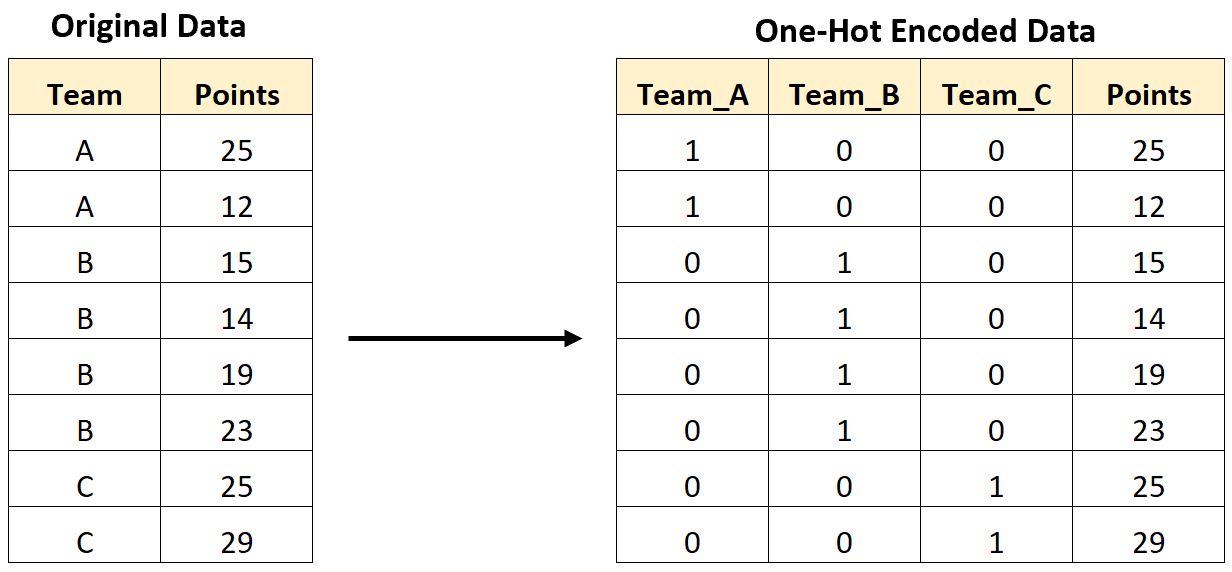

2. **Label encoder**
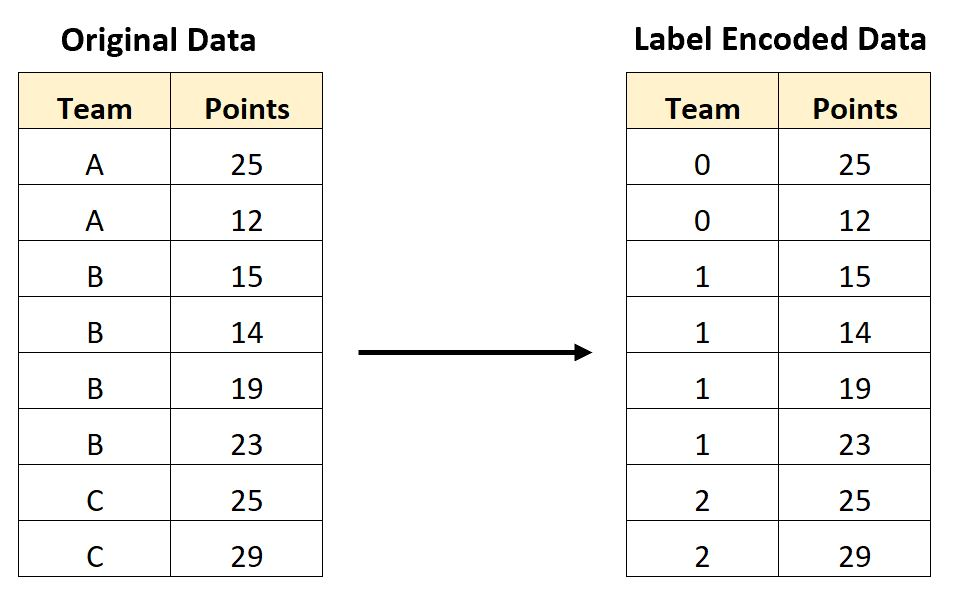

**Kelebihan One Hot Encoder:**
  - Tidak terjadi bias karena urutan (tidak terpengaruh oleh urutan)

**Kelemahan One Hot Encoder:**
  - Rawan peningkatan dimensi yang berlebihan sehingga bisa jadi menurunkan akurasi prediksi. Ingat bahwa semakin besar dimensi, maka data yang dibutuhkan juga semakin banyak.

**Kelebihan Label Encoder:**
  - Tidak menambah dimensi
  - Sederhana untuk diimplementasikan

**Kekurangan Label Encoder:**
  - Bisa bias terhadap urutan. Karena dia kan berupa urutan angka. Nah, takutnya program mengira itu adalah urutan yang sebenarnya, padahal kan urutan angka itu belum tentu memiliki makna khusus.

**One Hot Encoder**

In [11]:
df8 = df.copy() # copy, so df is not ruin when we do trial & error

In [12]:
df8 = pd.get_dummies(data = df8)
df8.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


**For Heart Disease, use Label Encoder**

In [33]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder from sklearn

In [34]:
kolom_kategorikal = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

LE = LabelEncoder() # create object of LabelEncoder

for kolom in kolom_kategorikal:
    df[kolom] = LE.fit_transform(df[kolom]) # change categorical data to numerical data

In [35]:
df.head() # show 5 first data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


#### **6. Machine Learning**

##### **Tipe-tipe Machine Learning:**
  


- **Supervised Learning:**
    Memprediksi data yang sudah ada labelnya. Contohnya kita tahu bahwa kita akan memprediksi apakah penumpang Titanic selamat atau tidak.
    Kita tahu jawaban yang benar dan salah sehingga bisa dievaluasi akurasinya.
    Contoh: Klasifikasi dan Kontiniu

- **Unsupervised Learning:**
    Memprediksi data yang belum ada labelnya. Contohnya adalah kita membuat cluster customer berdasarkan kepribadian customer tersebut. Contoh: Customer Clustering

- **Reinforcement Learning:**
    Agen belajar dari pengalaman. Jika benar akan dapat reward. Jika salah, dapet punishment. Contoh: robot

##### **Modeling Machine Learning** (templatenya bakal sering digunakan)


1. Split data menjadi X dan y
    
    X = Variabel independen
    
    y = Variabel dependen (yang akan diprediksi)

In [36]:
X = df.drop(["HeartDisease"], axis=1) # drop column HeartDisease
y = df["HeartDisease"] # take column HeartDisease as target

###### 2. **Normalisasi feature X menggunakan StandardScaler**

Tujuan: Biar terdistribusi normal (biar mean = 0 dan standar deviasi = 1)

Note: Jangan pernah normalisasi variabel y karena yang kita cari kan y

Rumus:

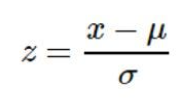

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler() # create object of StandardScaler

scaler.fit(X) # fit data to StandardScaler

X = scaler.transform(X) # transform data to StandardScaler

###### **3. Split data menjadi X_train, X_test, y_train, y_test**

In [75]:
from sklearn.model_selection import train_test_split # import train_test_split from sklearn

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92) # random state 92 / 40

###### 4. **Tuning Hyperparameter**
    
Bertujuan untuk mengatur parameter dari model agar bisa memberikan hasil yang maksimal.

GridSearchCV bertugas untuk mencari parameter terbaik secara otomatis. Jadi, kita tidak perlu tuning manual

- Using Random Forest Classifier from sklearn in titanic project

In [ ]:

from sklearn.model_selection import GridSearchCV

randomforest = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

grid_search = GridSearchCV(estimator = randomforest, param_grid = param_grid, cv = 3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

- Fit dan predict menggunakan best parameter yang sudah didapat di atas

In [ ]:
randomforest = RandomForestClassifier(**best_params)

randomforest.fit(X_train, y_train)

y_pred_train = randomforest.predict(X_train)
y_pred_test = randomforest.predict(X_test)

- Akurasi

In [ ]:
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

**Modeling**
**Model yang biasa digunakan untuk data klasifikasi:**
  - Logistic Regression
  - Catboost Classifier
  - XGBoost Classifier
  - Gradient Boosting Classifier
  - Naive Bayes
  - Perceptron
  - Support Vector Machine
  - Decision Tree
  - Random Forest
  
**Model yang biasa digunakan untuk data kontiniu:**
  - Linear Regression
  - Catboost Regressor
  - Random Forest Regressor
  - XGBoost Regressor
  - Gradient Boosting Regressor
  - Ridge
  - Lasso

  **For Titanic, we use :**
  - Logistic Regression
  - Random Forest Classifier
  - **Keyword chatgpt: ` i want to predict column named 'Survived'. The value is 0 or 1. I want to use random forest classifier model. Code it`**
  Gunakan keyword itu kalau kalian mau coding model yang lain

  **For Heart Disease, we use :**
  - Logistic Regression
  - Gradient Boosting Classifier
  - Catboost Classifier
  - XGB Classifier

##### **Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression from sklearn

In [40]:
logreg = LogisticRegression() # create object of LogisticRegression

logreg.fit(X_train, y_train) # train model  

y_pred_train = logreg.predict(X_train) # predict model with train data
y_pred_test = logreg.predict(X_test) # predict model with test data

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Evaluasi Akurasi

In [20]:
from sklearn.metrics import accuracy_score

In [41]:
akurasi_train = accuracy_score(y_train, y_pred_train) # show accuracy score of train data
akurasi_test = accuracy_score(y_test, y_pred_test) # show accuracy score of test data

print(f"Akurasi data train : {akurasi_train}") # show accuracy score of train data
print(f"Akurasi data test : {akurasi_test}") # show accuracy score of test data

Akurasi data train : 0.8460490463215259
Akurasi data test : 0.875


- Bonus! Confussion Matriks
    - sumbu Y = hasil data sebenarnya
    - sumbu X = hasil prediksi dari data yang kita train

In [42]:
from sklearn.metrics import confusion_matrix

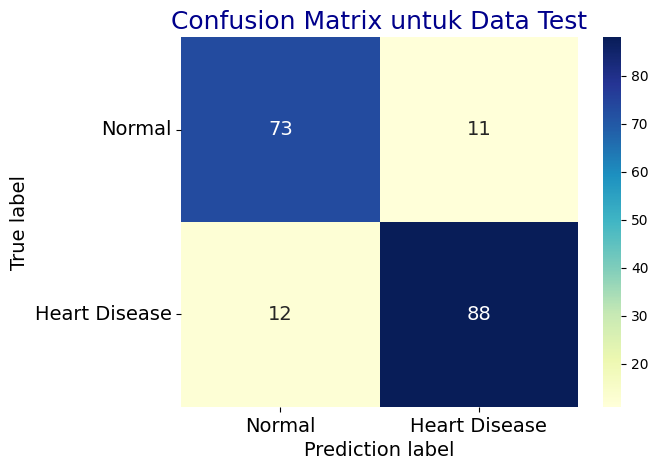

In [44]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ("Normal", "Heart Disease"), ("Normal", "Heart Disease"))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 14}, fmt="d", cmap="YlGnBu")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, fontsize = 14)

plt.title("Confusion Matrix untuk Data Test", fontsize = 18, color = "darkblue")
plt.ylabel("True label", fontsize = 14)
plt.xlabel("Prediction label", fontsize = 14)
plt.show()

- Setelah normalisasi dan menghapus outlier

In [47]:
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.8460490463215259
Akurasi data test = 0.875


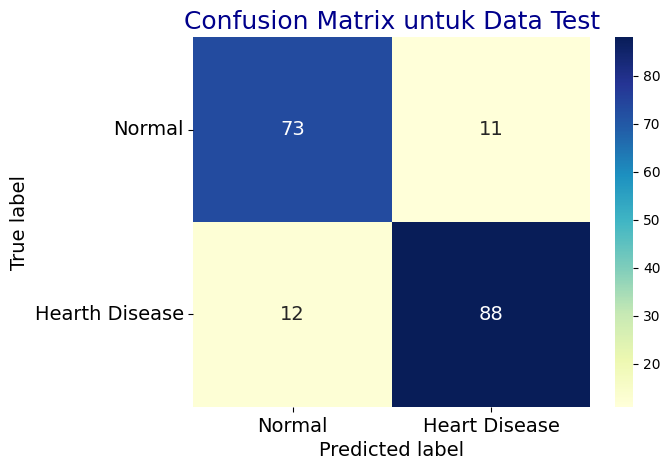

In [48]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Cuz it has not been normalization and remove outliers, so the result is the same**

##### **Gradient Boosting Classifier (Tuning Hyperparameter)**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
# Tuning Hyperparameter
model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# estimator --> model = GradientBoostingClassifier()
# cv --> cross validation / looping = 3 / 5 --> if too much, the data will be overfitting
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Gradient Boosting Best Parameters:", best_params)

Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [51]:
# train model with best parameters from grid search
gb = GradientBoostingClassifier(**best_params)

gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

In [52]:
akurasi_train = accuracy_score(y_train, y_pred_train) # y_train = actual / kunci jawaban, y_pred_train = prediction
akurasi_test = accuracy_score(y_test, y_pred_test) # y_test = actual / kunci jawaban, y_pred_test = prediction

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.9032697547683923
Akurasi data test = 0.9021739130434783


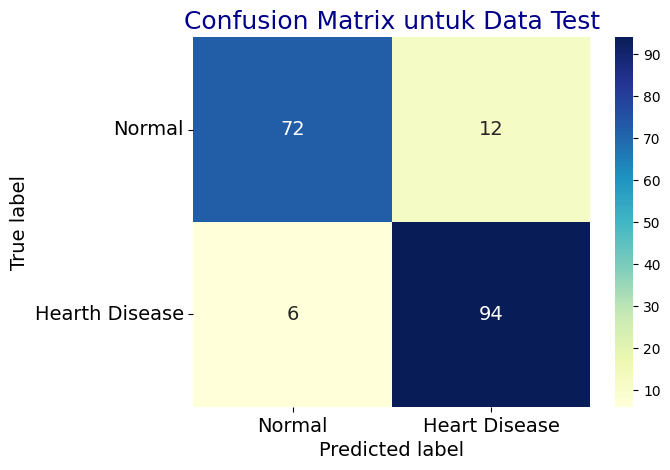

In [53]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- Setelah normalisasi dan menghapus outlier

In [54]:
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.9032697547683923
Akurasi data test = 0.9021739130434783


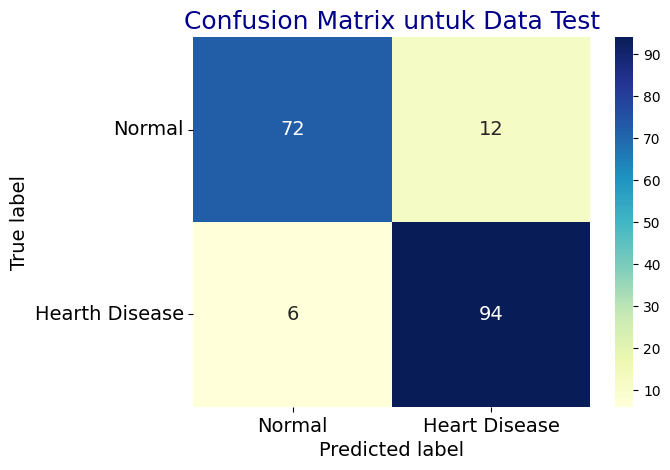

In [55]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Cuz it has not been normalization and remove outliers, so the result is the same**

##### **Catboost Classifier (Tuning Hyperparameter)**

In [56]:
%pip install catboost
from catboost import CatBoostClassifier

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 325.1 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 294.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.1/101.0 MB 1.1 MB/s eta 0:01:37
   ---------------------------------------- 0.2/101.0 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.2/101.0 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.2/101.0 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.3/101.0 MB 1.0 MB/s eta 0:01:41
   ---------------------------------------- 0.4/101.0 MB 1.2 MB/s eta 0:01:2

In [57]:
# Tuning Hyperparameter

model = CatBoostClassifier()

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8]
}

# estimator --> model = CatBoostClassifier()
# cv --> cross validation / looping = 3 / 5 --> if too much, the data will be overfitting
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("CatBoost Best Parameters:", best_params)

0:	learn: 0.6483872	total: 138ms	remaining: 13.7s
1:	learn: 0.6114240	total: 141ms	remaining: 6.91s
2:	learn: 0.5855911	total: 143ms	remaining: 4.62s
3:	learn: 0.5657931	total: 144ms	remaining: 3.45s
4:	learn: 0.5409138	total: 145ms	remaining: 2.76s
5:	learn: 0.5225914	total: 147ms	remaining: 2.3s
6:	learn: 0.5105273	total: 148ms	remaining: 1.97s
7:	learn: 0.4923888	total: 150ms	remaining: 1.73s
8:	learn: 0.4758003	total: 152ms	remaining: 1.54s
9:	learn: 0.4646893	total: 154ms	remaining: 1.38s
10:	learn: 0.4524917	total: 155ms	remaining: 1.25s
11:	learn: 0.4412283	total: 156ms	remaining: 1.15s
12:	learn: 0.4310558	total: 158ms	remaining: 1.05s
13:	learn: 0.4227736	total: 159ms	remaining: 978ms
14:	learn: 0.4150311	total: 161ms	remaining: 913ms
15:	learn: 0.4092136	total: 162ms	remaining: 851ms
16:	learn: 0.4012986	total: 163ms	remaining: 798ms
17:	learn: 0.3959009	total: 165ms	remaining: 751ms
18:	learn: 0.3889529	total: 167ms	remaining: 713ms
19:	learn: 0.3819681	total: 169ms	remainin

In [58]:
# train model with best parameters from grid search
catboostmodel = CatBoostClassifier(**best_params)

catboostmodel.fit(X_train, y_train)

y_pred_train = catboostmodel.predict(X_train)
y_pred_test = catboostmodel.predict(X_test)

0:	learn: 0.6842409	total: 3.83ms	remaining: 1.14s
1:	learn: 0.6764529	total: 7.61ms	remaining: 1.13s
2:	learn: 0.6692293	total: 11.3ms	remaining: 1.12s
3:	learn: 0.6613853	total: 15ms	remaining: 1.11s
4:	learn: 0.6535495	total: 19.4ms	remaining: 1.15s
5:	learn: 0.6455226	total: 23.4ms	remaining: 1.15s
6:	learn: 0.6374436	total: 27.5ms	remaining: 1.15s
7:	learn: 0.6308077	total: 30.3ms	remaining: 1.11s
8:	learn: 0.6232601	total: 34.6ms	remaining: 1.12s
9:	learn: 0.6157552	total: 38.6ms	remaining: 1.12s
10:	learn: 0.6086929	total: 43.3ms	remaining: 1.14s
11:	learn: 0.6028933	total: 46.4ms	remaining: 1.11s
12:	learn: 0.5967624	total: 49.7ms	remaining: 1.1s
13:	learn: 0.5904475	total: 53ms	remaining: 1.08s
14:	learn: 0.5845391	total: 56.2ms	remaining: 1.07s
15:	learn: 0.5788358	total: 60ms	remaining: 1.06s
16:	learn: 0.5729389	total: 63.4ms	remaining: 1.05s
17:	learn: 0.5670684	total: 66.6ms	remaining: 1.04s
18:	learn: 0.5616181	total: 70.5ms	remaining: 1.04s
19:	learn: 0.5574376	total: 7

In [59]:
# Calculate accuracy score

akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.9168937329700273
Akurasi data test = 0.8967391304347826


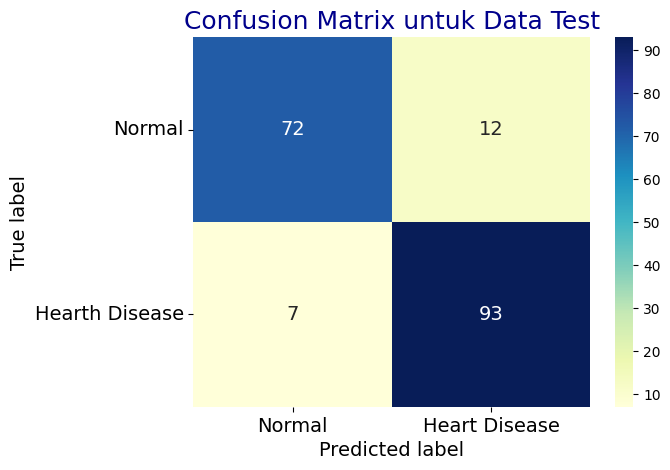

In [60]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- Setelah normalisasi dan menghapus outlier 

In [61]:
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.9168937329700273
Akurasi data test = 0.8967391304347826


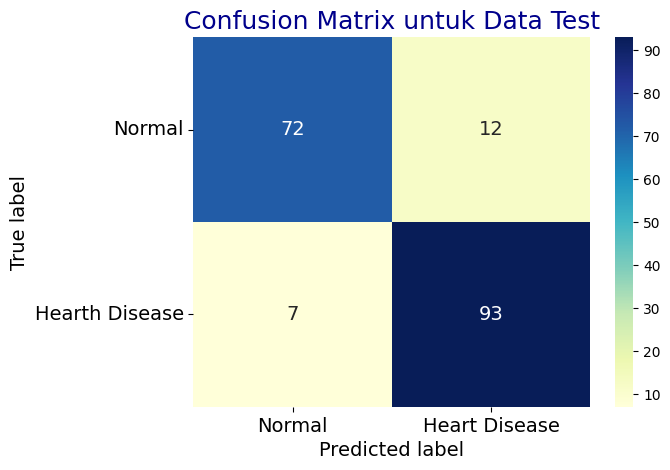

In [62]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Cuz it has not been normalization and remove outliers, so the result is the same**

##### **XGB Classifier (Tuning HyperParameter)**

In [64]:
from xgboost import XGBClassifier

In [66]:
# Tuning Hyperparameter
model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# estimator --> model = XGBClassifier()
# cv --> cross validation / looping = 3 / 5 --> if too much, the data will be overfitting
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("XGB Best Parameters:", best_params)

XGB Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [67]:
# train model with best parameters from grid search
xgb = XGBClassifier(**best_params)

xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)


In [68]:
# Calculate accuracy score
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.9386920980926431
Akurasi data test = 0.8967391304347826


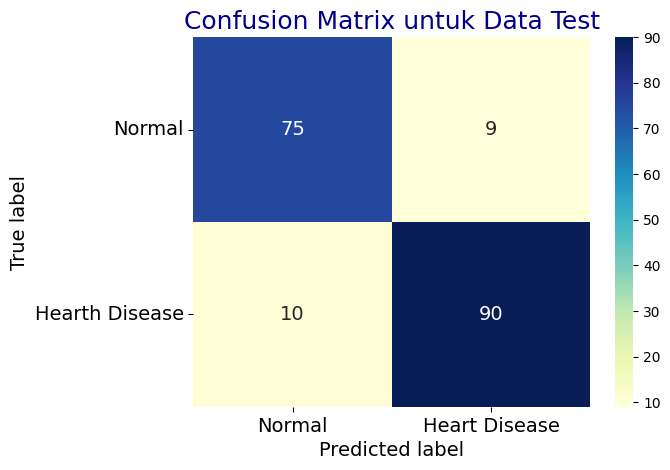

In [69]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

- Setelah normalisasi dan menghapus outlier

In [70]:
akurasi_train = accuracy_score(y_train, y_pred_train)
akurasi_test = accuracy_score(y_test, y_pred_test)

print("Akurasi data train =", akurasi_train)
print("Akurasi data test =", akurasi_test)

Akurasi data train = 0.9386920980926431
Akurasi data test = 0.8967391304347826


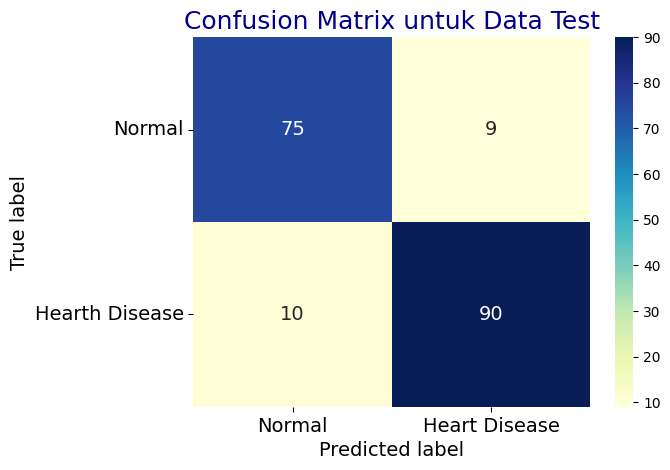

In [71]:
# Confussion Matrix
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Normal', 'Hearth Disease'), ('Normal', 'Heart Disease'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

**Cuz it has not been normalization and remove outliers, so the result is the same**

##### **TRY TO PREDICT WITH BEST MODEL**

In [72]:
inputan = [[48, 0, 0, 138, 214, 0, 1, 108, 1, 1.5, 1]]
inputan = scaler.transform(inputan)
y_pred_inputan = gb.predict(inputan) # predict model with inputan data
# gb = GradientBoostingClassifier(**best_params)

NameError: name 'scaler' is not defined

##### **Save Model Result so you dont have to compile it again**

In [ ]:
import pickle
with open('heart_disease_model.pickle', 'wb') as f:
    pickle.dump(gb, f)

In [ ]:
with open('heart_disease_model.pickle', 'rb') as f:
    model = pickle.load(f)

##### **Tambahan Info: Evaluasi untuk Kasus Label Kontiniu**


Jika kalian memprediksi label kontinu, seperti harga rumah, harga saham, dll, maka kalian dapat mengevaluasi model kalian menggunakan MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), MSE (Mean Squared Error), R2 Score.

Semakin kecil MAE, MAPE, MSE, maka semakin baik.

Semakin R2 score mendekati 100%, maka semakin baik.

Contoh kodenya:

In [ ]:
# R2 Score
# print(f"Score R2 of test data = {r2_score(y_test, y_pred_test)}")
# print(f"Score R2 of train data = {r2_score(y_train, y_pred_train)}")

In [ ]:
# MAE Score
# print(f"Mean absolute error of test data = {mean_absolute_error(y_test, y_pred_test)}")
# print(f"Mean absolute error of train data = {mean_absolute_error(y_train, y_pred_train)}")